In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import operator

In [177]:
df = pd.read_csv('Position_Salaries.csv')

x = df.iloc[::,1]
y = df.iloc[::,2]

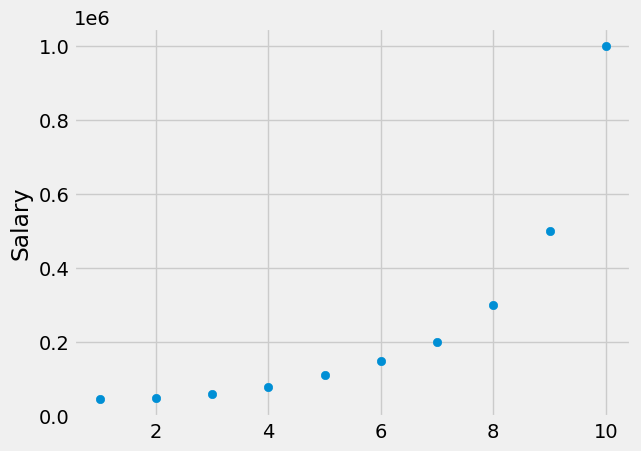

In [178]:
plt.scatter(x, y)
plt.grid(True)
plt.ylabel('Salary')
plt.show()

In [179]:
df.iloc[::, 1:3].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [180]:
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [181]:
model_poly = PolynomialFeatures(degree=2)
x_poly = model_poly.fit_transform(x)

model_l_p = LinearRegression()
model_l_p.fit(x_poly, y)

LinearRegression()

In [182]:
y_pred_poly = model_l_p.predict(x_poly)

In [183]:
MAE = mean_absolute_error(y, y_pred_poly)
MSE = mean_squared_error(y, y_pred_poly)
RMSE = MSE**0.5
r2 = r2_score(y, y_pred_poly)

print(f'MAE: {MAE:.2f}', f'MSE: {MSE:.2f}', f'RMSE: {RMSE:.2f}', f'R2: {r2:.2f}', f'Score: {model_l_p.score(x_poly, y):.2f}', sep='\n')

MAE: 70218.18
MSE: 6758833333.33
RMSE: 82212.12
R2: 0.92
Score: 0.92


In [185]:
sorted_zip = sorted(zip(x, y_pred_poly), key=operator.itemgetter(0))

X, Y_poly_pred = zip(*sorted_zip)

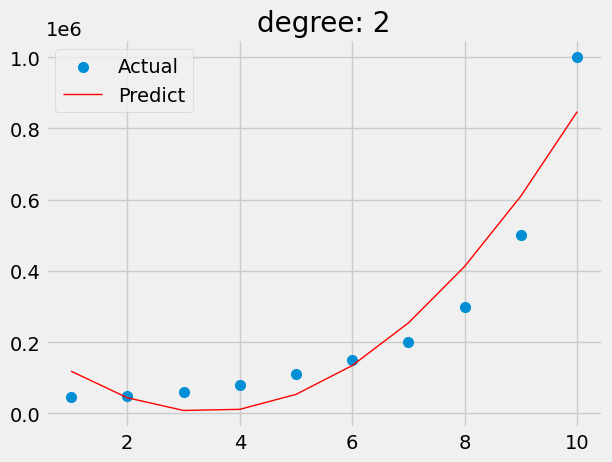

In [186]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y, label='Actual', linewidth=2)
plt.plot(X, Y_poly_pred, c='r', label='Predict', linewidth=1)
plt.grid(True)
plt.legend()
plt.title('degree: 2')
plt.show()